# Diabetes prediction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information

# Data Exploration , Data Preprocessing and Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB

In [2]:
dataset=pd.read_csv("E:\CS\Level 4\ML\Labs\Lab 3\diabetes_prediction_dataset.csv",encoding='latin-1')

In [3]:
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
dataset.shape

(100000, 9)

In [6]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
dataset.duplicated().sum()

3854

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.duplicated().sum()

0

In [10]:
def num_cols(dataset):
    num = (dataset.dtypes != 'object')  # Check if the dtype is not 'object'
    numerical_cols = num[num].index
    return numerical_cols
numerical_cols = num_cols(dataset)
print(f"Numerical Columns are: {numerical_cols}")

Numerical Columns are: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [11]:
dataset.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
dataset.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [13]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


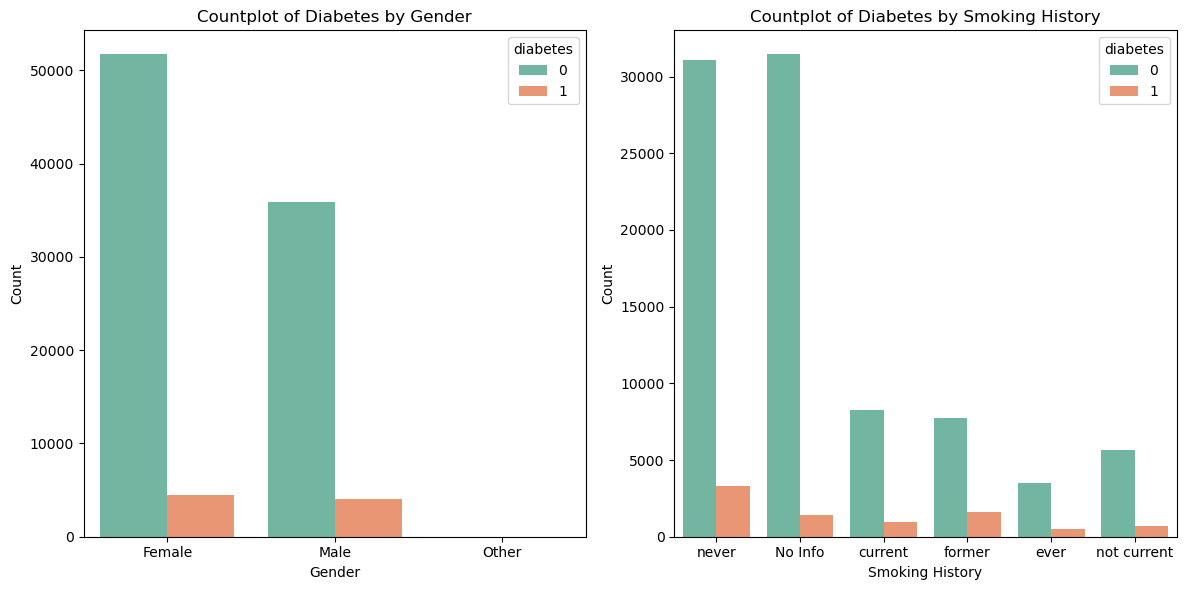

In [14]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='diabetes', data=dataset, palette='Set2')
plt.title('Countplot of Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='smoking_history', hue='diabetes', data=dataset, palette='Set2')
plt.title('Countplot of Diabetes by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')

plt.tight_layout() 
plt.show()

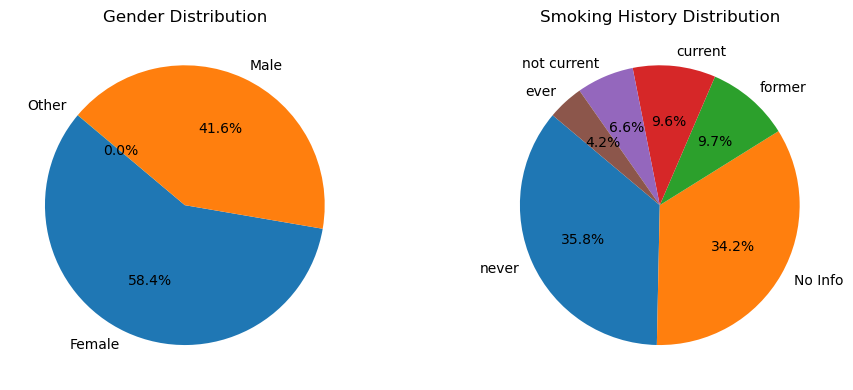

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
gender_counts = dataset['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
smoking_counts = dataset['smoking_history'].value_counts()
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoking History Distribution')

plt.tight_layout()
plt.show()

<Axes: >

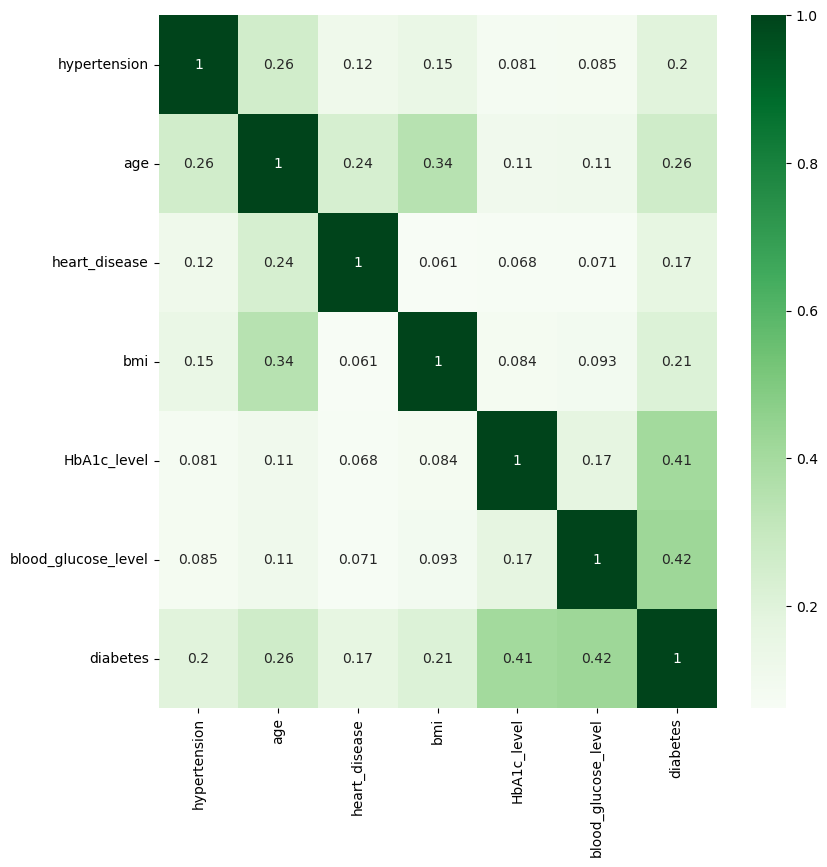

In [16]:
corr_dataset=dataset[['hypertension', 'age', 'heart_disease', 'bmi','HbA1c_level','blood_glucose_level','diabetes']]
plt.figure(figsize=(9,9))
sns.heatmap(corr_dataset.corr(),annot=True,cmap='Greens')

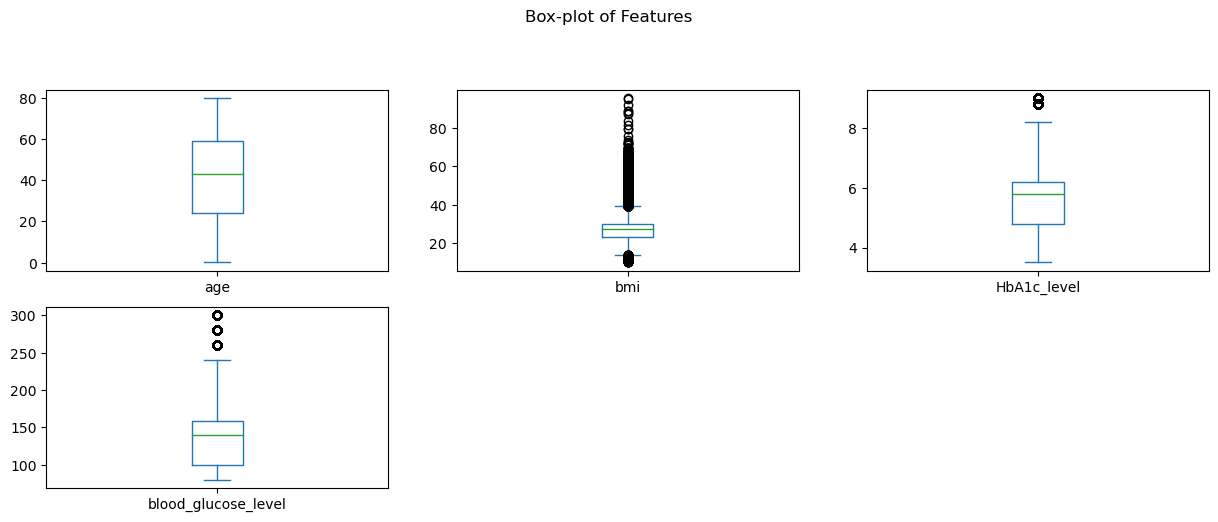

In [17]:
data = dataset[['age', 'bmi','HbA1c_level','blood_glucose_level']]
# Plot boxplots for each selected column
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 8))
plt.suptitle('Box-plot of Features') 
plt.show()

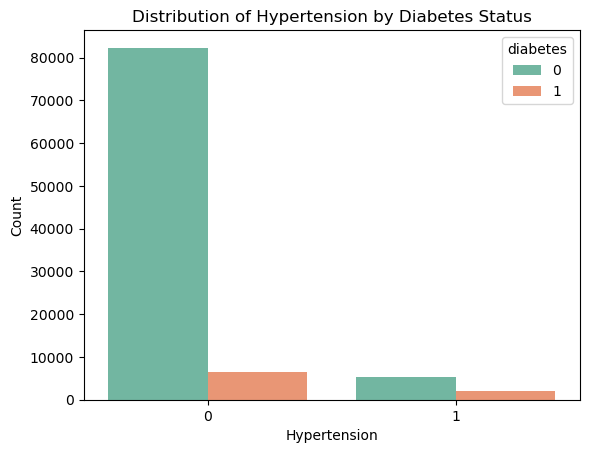

In [18]:
sns.countplot(x='hypertension', hue='diabetes', data=dataset, palette='Set2')
plt.title('Distribution of Hypertension by Diabetes Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Show the plot
plt.show()

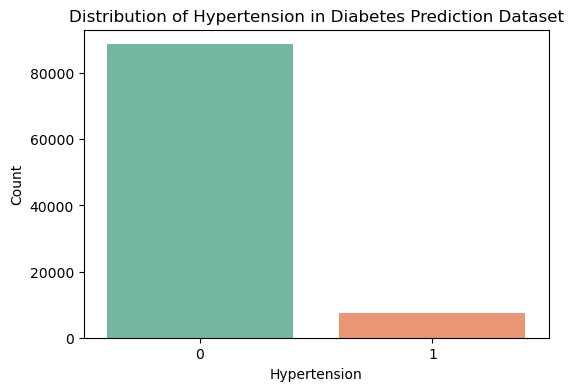

In [19]:
plt.figure(figsize=(6, 4))

# Plotting count plot for 'hypertension'
sns.countplot(x='hypertension', data=dataset, palette='Set2')
plt.title('Distribution of Hypertension in Diabetes Prediction Dataset')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Show the plot
plt.show()

In [20]:
dataset['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [21]:
dataset['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [22]:
smoking_map = {'never': 1, 'current': 2, 'No Info': 3, 'former': 4, 'not current': 5, 'ever': 6}
dataset['smoking_history'] = dataset['smoking_history'].replace(smoking_map) 

In [23]:
dataset['gender'] = dataset['gender'].replace({ 'Female': 0, 'Male': 1, 'Other': 2})
dataset['gender'].value_counts()

0    56161
1    39967
2       18
Name: gender, dtype: int64

In [24]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [33]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


# Models

In [34]:
X = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]

In [35]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
data = scaler.fit_transform(data) 
print(data)




[[1.         0.17717087 0.56363636 0.27272727]
 [0.67467467 0.20203081 0.56363636 0.        ]
 [0.34934935 0.20203081 0.4        0.35454545]
 ...
 [0.82482482 0.20798319 0.4        0.34090909]
 [0.2992993  0.29656863 0.09090909 0.09090909]
 [0.71221221 0.14495798 0.56363636 0.04545455]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
LogisticModel = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Hyperparameters: {'C': 1}
Accuracy: 0.9612584503380135


In [30]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[17397   140]
 [  605  1088]]


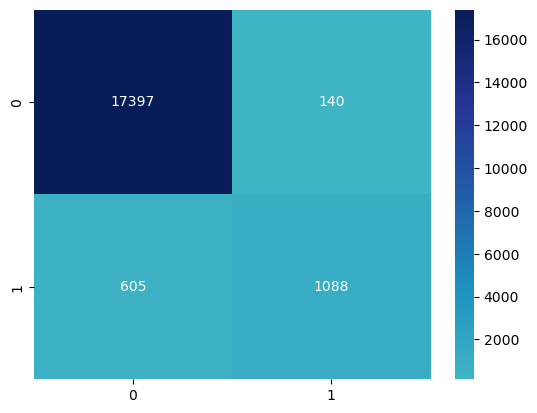

In [31]:
custom_cmap = 'YlGnBu'
sns.heatmap(CM, cmap=custom_cmap, annot=True, fmt="d", center=True)
plt.show()

Decision Tree Classifier

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
    ('decision_tree', GridSearchCV(DecisionTreeClassifier(),
                                   {'criterion': ('gini', 'entropy'),
                                    'splitter': ('best', 'random'),
                                    'max_depth': [2, 5, 6, 7, 8, 9],
                                    'random_state': [33, 44, 66, 77, 99]},
                                   cv=2,
                                   return_train_score=True))
])

pipeline.fit(X_train, y_train)
print('Best Score is:', pipeline.named_steps['decision_tree'].best_score_)
print('Best Parameters are:', pipeline.named_steps['decision_tree'].best_params_)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score on Test Set:', accuracy)

Best Score is: 0.9702142597118935
Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'random_state': 44, 'splitter': 'random'}
Accuracy Score on Test Set: 0.9731669266770671


In [39]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[17537     0]
 [  516  1177]]


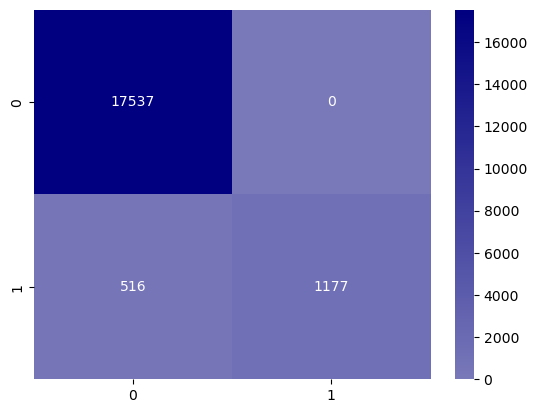

In [40]:
custom_cmap = sns.light_palette("navy", as_cmap=True)
sns.heatmap(CM, cmap=custom_cmap, annot=True, fmt="d", center=True)
plt.show()

RandomForestClassifier

In [59]:
RandomModel=RandomForestClassifier()
parametrs_rnf={'n_estimators':[100,200], 'max_depth':[20,30,4,50,6],'criterion':('gini', 'entropy')}
grid_forest=GridSearchCV(RandomModel, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [20, 30, 4, 50, 6],
                         'n_estimators': [100, 200]})

In [60]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

In [63]:
print('Best Parameters are :', grid_forest.best_params_)

Best Parameters are : {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}


In [67]:
AccScore = accuracy_score(y_test, y_pred_rnf, normalize=True)
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.9731669266770671


In [47]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[17537     0]
 [  516  1177]]


In [48]:
RecallScore = recall_score(y_test, y_pred, average='micro') 
print('Recall Score is : ', RecallScore)


Recall Score is :  0.9731669266770671


SVC

In [68]:
SVCModel=SVC()

In [69]:
SVCModel.fit(X_train, y_train)

SVC()

In [71]:
y_pred = SVCModel.predict(X_test)
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.9627145085803432


In [72]:
PrecisionScore = precision_score(y_test, y_pred, average='micro') 
print('Precision Score is : ', PrecisionScore)


Precision Score is :  0.9627145085803432


Naive_bayes

In [73]:
parameters = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  # Adjust the range as needed
BernoulliNBModel = BernoulliNB()
grid_search = GridSearchCV(BernoulliNBModel, parameters, cv=5)


In [74]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_BernoulliNBModel = BernoulliNB(alpha=best_params['alpha'])
best_BernoulliNBModel.fit(X_train, y_train)


BernoulliNB(alpha=0.1)

In [75]:
y_pred = best_BernoulliNBModel.predict(X_test)
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9105044201768071


Confusion Matrix is : 
 [[17441    96]
 [ 1625    68]]


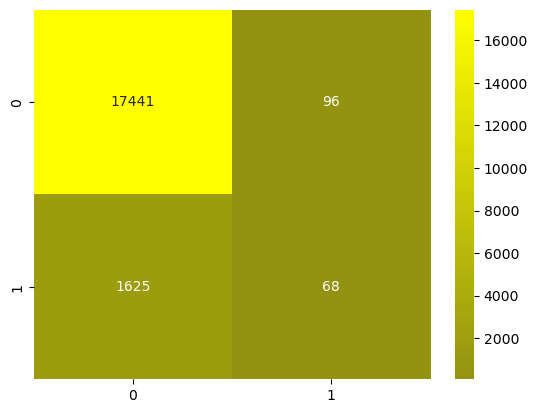

In [76]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
custom_cmap = sns.dark_palette("yellow", as_cmap=True)
sns.heatmap(CM, cmap=custom_cmap, annot=True, fmt="d", center=True)
plt.show()

KNN

In [77]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(X_train, y_train)


KNeighborsClassifier()

In [78]:
y_pred = KNNModel.predict(X_test)
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9614144565782631


In [79]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)



Confusion Matrix is : 
 [[17419   118]
 [  624  1069]]


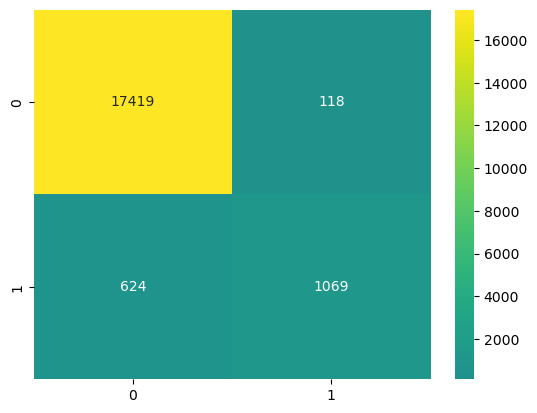

In [80]:
custom_cmap = 'viridis'

# Plot the heatmap
sns.heatmap(CM, cmap=custom_cmap, annot=True, fmt="d", center=True)
plt.show()